# CSCI 5521 — HW2 (CODE) — Question 3

**This notebook contains only the coding parts and you will need to submit a separate PDF for other parts of the homework.**
**INSTRUCTIONS**
- Make a copy of this template file to modify the file.
- Download and upload the below files on to the Colab environment. Do not modify the provided data files. Provided files:
  - optdigits_train.txt
  - optdigits_test.txt
- Implement the `TODO` sections

**SUBMISSION**

Complete and submit this file alongside a PDF file with the rest of your answers.

## Setup (Imports, Data Paths and Data Loader)

In [1]:
# TODO: Edit if your files are elsewhere
TRAIN_PATH = "optdigits_train.txt"
TEST_PATH  = "optdigits_test.txt"

In [2]:
import numpy as np
training_data = np.loadtxt(TRAIN_PATH, delimiter=',', dtype=np.float64)
test_data = np.loadtxt(TEST_PATH, delimiter=',', dtype=np.float64)

## Part A — `KNN`

In [ ]:
from scipy.spatial.distance import cdist

def myKNN(training_data, test_data, k):
    """
    Implement k-Nearest Neighbors classification algorithm.
    
    Parameters:
    -----------
    training_data : numpy.ndarray
        Training dataset with features in columns 0:-1 and labels in last column
    test_data : numpy.ndarray
        Test dataset with features in columns 0:-1 and labels in last column
    k : int
        Number of nearest neighbors to consider for classification
    
    Returns:
    --------
    test_err : float
        Classification error rate on test data (fraction of misclassified samples)
    """
    # TODO: Separate features from labels for training data
    features_train = training_data[:, :-1]
    # TODO: Separate features from labels for test data
    features_test = test_data[:, :-1]
    
    # TODO: Compute distance matrix between training and test samples
    # - Use cdist to compute distances between training and test points
    # - Result should be (n_train x n_test) matrix
    distances = cdist(features_test, features_train).T
    n_test = features_test.shape[0]
    n_train = features_train.shape[0]

    # TODO: Find k nearest neighbors for each test sample
    neighbors = np.zeros((n_test, k), dtype=int)
    for i in range(n_test):
        neighbors[i, :] = np.argsort(distances[:, i])[:k]   

    
    # TODO: Predict labels using majority voting
    labels_train = training_data[:, -1].astype(int)
    predicted_labels = np.zeros(n_test, dtype=int)
    for i in range(n_test): 
        k_labels = labels_train[neighbors[i, :]]
        predicted_labels[i] = np.bincount(k_labels).argmax()

    
    # TODO: Compute classification error
    true_labels = test_data[:, -1].astype(int)
    test_err = np.mean(predicted_labels != true_labels)
    

    return test_err

In [4]:
def find_opt_k(training_data, test_data, ks):
    """
    Find optimal k value for KNN by testing different k values.
    
    Parameters:
    -----------
    training_data : numpy.ndarray
        Training dataset with features and labels
    test_data : numpy.ndarray
        Test dataset with features and labels
    ks : list
        List of k values to test
    
    Returns:
    --------
    test_errs : numpy.ndarray
        Array of test errors corresponding to each k value
    """
    test_errs = np.zeros(len(ks))
    for i in range(len(ks)):
        test_errs[i] = myKNN(training_data, test_data, ks[i])
    
    return test_errs


# Test the function with different k values
print("Testing k values [1, 3, 5, 7]:")
print(find_opt_k(training_data, test_data, [1, 3, 5, 7]))

Testing k values [1, 3, 5, 7]:
[0.05387205 0.04040404 0.04377104 0.05387205]


## Part B — `PCA`

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def myPCA(data, n_comp=0, plot=False):
    """
    Perform Principal Component Analysis (PCA) on the given data.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Dataset with features in columns 0:-1 and labels in last column
    n_comp : int, optional (default=0)
        Number of principal components to return. If 0, automatically determine
        the number needed to capture 90% of variance
    plot : bool, optional (default=False)
        Whether to plot the explained variance ratio
    
    Returns:
    --------
    D : numpy.ndarray
        Eigenvalues (explained variance) for the selected components
    V : numpy.ndarray
        Eigenvectors (principal components) for the selected components
    """
    # TODO: Separate features from labels
    features = data[:, :-1]
    
    # TODO: Compute covariance matrix
    covariance = np.cov(features, rowvar=False)
    
    # TODO: Compute eigenvalues and eigenvectors
    # - Use np.linalg.eigh for symmetric matrix
    # - Sort eigenvalues and eigenvectors in descending order
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # TODO: Determine number of components (if n_comp=0)
    # - Compute cumulative proportion of explained variance
    # - Find minimum components needed for >90% variance
    if n_comp==0:
        cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
        n_comp = np.searchsorted(cumulative_variance, 0.9) + 1

        pass

    
    # TODO: Create visualization (if plot=True)
    # - Plot explained variance ratio vs component number
    if plot:
        plt.figure()
        plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues / np.sum(eigenvalues), marker='o')

        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('PCA Explained Variance Ratio vs Principal Component')
        plt.grid()
        
        plt.show()
        pass

    
    # TODO: Return selected eigenvalues and eigenvectors
    return eigenvalues[:n_comp], eigenvectors[:, :n_comp]

Testing k values with PCA [1, 3, 5, 7]:


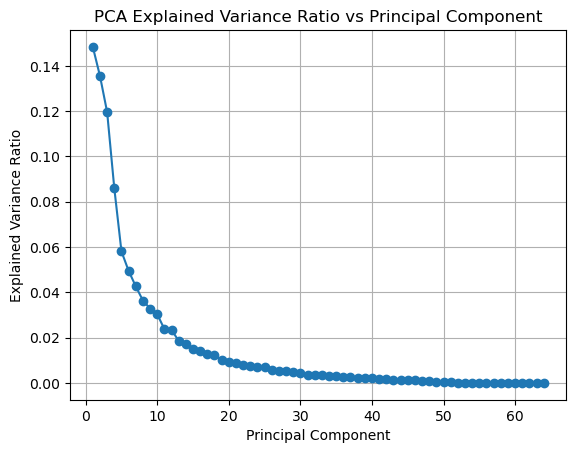

[0.04713805 0.04713805 0.05387205 0.05387205]


In [8]:
def find_opt_k_with_pca(training_data, test_data, ks):
    """
    Find optimal k value for KNN after applying PCA dimensionality reduction.
    
    Parameters:
    -----------
    training_data : numpy.ndarray
        Training dataset with features and labels
    test_data : numpy.ndarray
        Test dataset with features and labels
    ks : list
        List of k values to test
    
    Returns:
    --------
    test_errs : numpy.ndarray
        Array of test errors corresponding to each k value after PCA
    """
    D, V = myPCA(training_data, plot=True)
    training_data = np.column_stack((training_data[:, 0:-1]@V, training_data[:,-1]))
    test_data = np.column_stack((test_data[:, 0:-1]@V, test_data[:,-1]))
    
    test_errs = np.zeros(len(ks))
    for i in range(len(ks)):
        test_errs[i] = myKNN(training_data, test_data, ks[i])

    return test_errs


print("Testing k values with PCA [1, 3, 5, 7]:")
print(find_opt_k_with_pca(training_data, test_data, [1, 3, 5, 7]))

## Part C 

**Objective:** Visualize the training and test data projected onto the first 2 principal components.

- Apply PCA to the training data
- Project both training and test data onto the first 2 principal components  
- Create a scatter plot showing both datasets with different markers

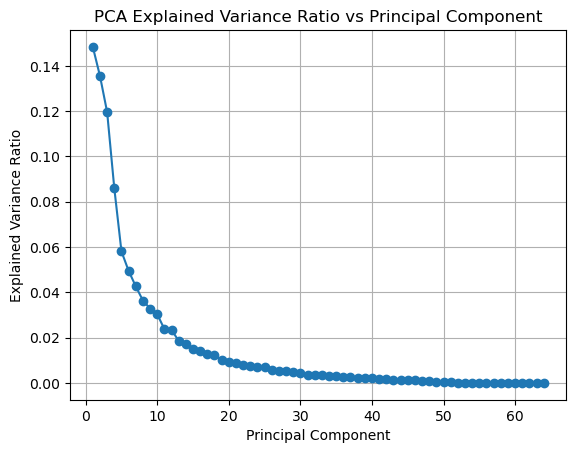

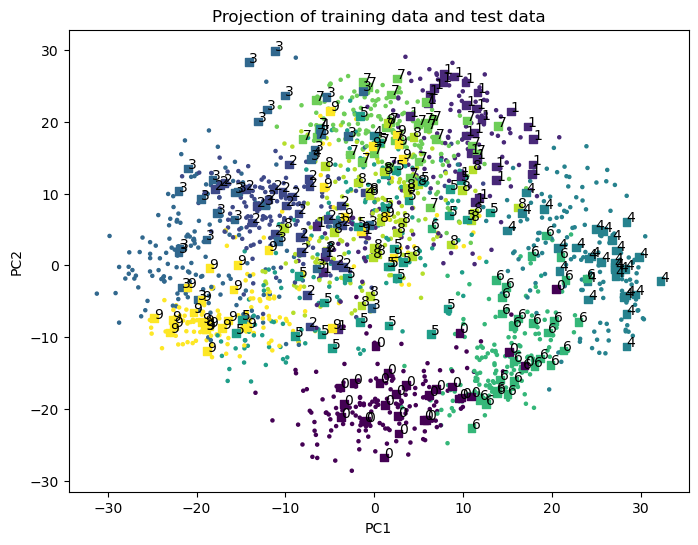

In [19]:
# TODO: Apply PCA to training data and get principal components
myPCA(training_data, plot=True)
# eigenvalues = eigenvalues[:n_comp]
# eigenvectors = eigenvectors[:, :n_comp]

# TODO: Separate features from labels for both training and test data
features_train = training_data[:, :-1]
training_labels = training_data[:, -1].astype(int)
features_test = test_data[:, :-1]
test_labels = test_data[:, -1].astype(int)

# TODO: Project training data onto first 2 principal components
plot_data = features_train @ myPCA(training_data, n_comp=2)[1]

plt.figure(figsize=(8,6))
plt.clf()
plt.scatter(plot_data[:,0], plot_data[:,1], 5, c=training_labels, marker='o')

# TODO: Project test data onto same principal components
plot_data = features_test @ myPCA(training_data, n_comp=2)[1]

plt.scatter(plot_data[:,0], plot_data[:,1], 30, c=test_labels, marker='s')
for i in range(np.shape(test_data)[0]):
    plt.annotate(str(test_labels[i].astype(np.int8)), (plot_data[i, 0], plot_data[i, 1]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of training data and test data')
plt.savefig('./fig_2c.png')
plt.show()



## Part D — `LDA`

In [ ]:
def myLDA(data, n_comp):
    """
    Perform Linear Discriminant Analysis (LDA) for dimensionality reduction.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Dataset with features in columns 0:-1 and labels in last column
    n_comp : int
        Number of linear discriminant components to return
    
    Returns:
    --------
    D : numpy.ndarray
        Eigenvalues for the selected discriminant components
    V : numpy.ndarray
        Eigenvectors (discriminant directions) for the selected components
    R_I : numpy.ndarray
        Indices of features that were retained (non-zero sum features)
    """
    # TODO: Separate features from labels
    features = data[:, :-1]
    labels = data[:, -1].astype(int)

    # TODO: Remove features with zero variance
    filtered_features = np.where(np.var(features, axis=0) > 0)[0]
    features = features[:, filtered_features]
    
    # TODO: Compute class means and overall mean
    class_labels = np.unique(labels)
    n_features = features.shape[1]
    overall_mean = np.mean(features, axis=0)
    class_means = np.array([np.mean(features[labels == c], axis=0) for c in class_labels])

    # TODO: Compute between-class scatter matrix (Sb)
    n_features = features.shape[1]
    sb = np.zeros((n_features, n_features))
    for i, c in enumerate(class_labels):
        n_c = np.sum(labels == c)
        mean_diff = (class_means[i] - overall_mean).reshape(-1, 1) 
        
        sb += n_c * (mean_diff @ mean_diff.T)
    
    # TODO: Compute within-class scatter matrix (Sw)
    n_features = features.shape[1]
    sw = np.zeros((n_features, n_features))
    for i, c in enumerate(class_labels):
        class_data = features[labels == c]
        centered_data = class_data - class_means[i]

        sw += centered_data.T @ centered_data
    
    # TODO: Solve generalized eigenvalue problem
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(sw) @ sb)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    # eigvecs = eigvecs[:, sorted_indices] will cause error: complex128
    eigvecs = np.real(eigvecs)[:, sorted_indices]  # Make real to avoid complex numbers
    
    # TODO: Return top n_comp components and feature indices
    return eigvals[:n_comp], eigvecs[:, :n_comp], filtered_features
    # pass

In [15]:
def comb_knn_lda(training_data, test_data, ls, ks):
    """
    Combine LDA dimensionality reduction with KNN classification.
    Test different numbers of LDA components and k values for KNN.
    
    Parameters:
    -----------
    training_data : numpy.ndarray
        Training dataset with features and labels
    test_data : numpy.ndarray
        Test dataset with features and labels
    ls : list
        List of number of LDA components to test
    ks : list
        List of k values for KNN to test
    
    Returns:
    --------
    test_errs : numpy.ndarray
        2D array of test errors with shape (len(ls), len(ks))
        Rows correspond to different numbers of LDA components
        Columns correspond to different k values
    """
    test_errs = np.zeros((len(ls), len(ks)))
    for i in range(len(ls)):
        D, V, R_I = myLDA(training_data, ls[i])
        training_data_proj = np.column_stack((training_data[:, R_I]@V, training_data[:,-1]))
        test_data_proj = np.column_stack((test_data[:, R_I]@V, test_data[:,-1]))
        for j in range(len(ks)):
            test_errs[i, j] = myKNN(training_data_proj, test_data_proj, ks[j])

    return test_errs

print("Testing LDA components [2,4,9] with k values [1,3,5,7]:")
print(comb_knn_lda(training_data, test_data, [2,4,9], [1,3,5,7]))

Testing LDA components [2,4,9] with k values [1,3,5,7]:
[[0.44444444 0.41414141 0.40740741 0.38720539]
 [0.19191919 0.18518519 0.15824916 0.15824916]
 [0.0976431  0.09427609 0.09427609 0.08417508]]


## Part E

**Objective:** Visualize the training and test data projected onto the first 2 linear discriminant components.

- Apply LDA to find the best discriminant directions
- Project both training and test data onto the first 2 LDA components


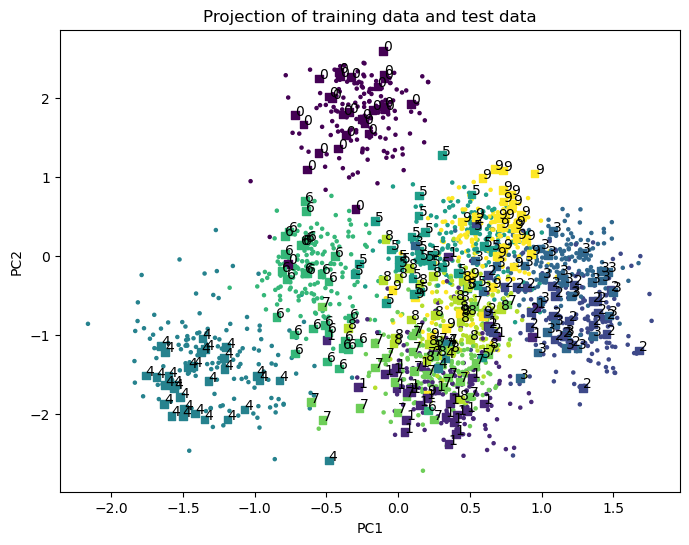

In [18]:
training_data = np.loadtxt(TRAIN_PATH, delimiter=',', dtype=np.float64)
test_data = np.loadtxt(TEST_PATH, delimiter=',', dtype=np.float64)


# TODO: Apply LDA to get 2 discriminant components
D, V, R_I = myLDA(training_data, n_comp=2)

# TODO: Separate features from labels for both datasets
training_labels = training_data[:, -1].astype(int)
test_labels = test_data[:, -1].astype(int)
features_train = training_data[:, :-1]
features_test = test_data[:, :-1]

# TODO: Project training data onto LDA components
plot_data = features_train[:, R_I] @ V

plt.figure(figsize=(8,6))
plt.clf()
plt.scatter(plot_data[:,0], plot_data[:,1], 5, c=training_labels, marker='o')


# TODO: Project test data onto same LDA components
plot_data = features_test[:, R_I] @ V

plt.scatter(plot_data[:,0], plot_data[:,1], 30, c=test_labels, marker='s')
for i in range(np.shape(test_data)[0]):
    plt.annotate(str(test_labels[i].astype(np.int8)), (plot_data[i, 0], plot_data[i, 1]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of training data and test data')
plt.savefig('./fig_2e.png')
plt.show()

